#predict Weight based on Height

In [324]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [325]:
df = pd.read_csv('Height-Weight Data.csv')

In [326]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [327]:
df.shape

(3501, 2)

In [328]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3501 entries, 0 to 3500
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  3501 non-null   float64
 1   Weight  3501 non-null   float64
dtypes: float64(2)
memory usage: 54.8 KB


In [329]:
df.describe()

,Height,Weight
count,3501.000000,3501.000000
mean,69.024411,186.891258
std,2.858583,19.903132
min,59.380650,65.780000
25%,67.193523,173.896237
50%,69.044211,187.308370
75%,70.976491,200.356448
max,78.998742,269.989698


#Drawing scatter plot of dataset

Text(0.5, 1.0, 'Height and Weight')

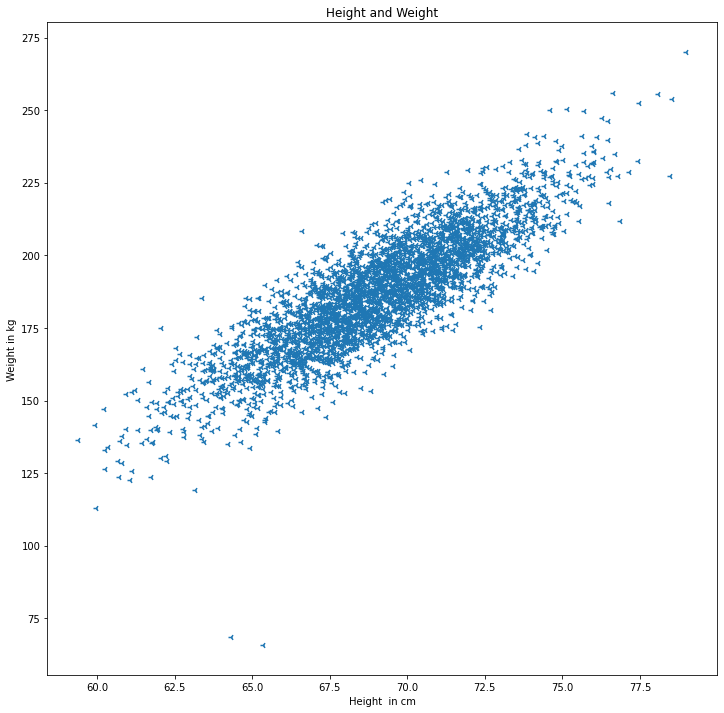

In [330]:
plt.figure(figsize=(12,12))
plt.scatter(df.Height , df.Weight,marker='3') 
plt.xlabel('Height  in cm')
plt.ylabel('Weight in kg')
plt.title('Height and Weight')

In [331]:
df.shape

(3501, 2)

In [332]:
x = df[['Height']]  # x = df.drop('rent', axis=1) # ind var
y = df['Weight'] #dep variable

# Split the dataset 

In [333]:
df.head(10)

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
5,67.253016,152.212156
6,68.785081,183.927889
7,68.348516,167.971111
8,67.018950,175.929440
9,63.456494,156.399676


In [334]:
from sklearn.model_selection import train_test_split as tts

In [335]:
xtrain , xtest , ytrain, ytest = tts(x,y,train_size=.70,random_state=1) #test_size=.30
#train, test = tts(df,train_size=.70,random_state=1) #test_size=.30

In [336]:
xtrain.shape

(2450, 1)

In [337]:
ytrain.shape

(2450,)

#Linear Regression

In [338]:
from sklearn.linear_model import LinearRegression

In [339]:
# creating object for linear model
lr = LinearRegression() 

In [340]:
#train the ML model  
lr.fit(xtrain ,ytrain)
 

LinearRegression()

In [341]:
m = lr.coef_
c = lr.intercept_

#prediction

In [342]:
x = 73.847017
y = (m * x) + c

In [343]:
y

array([215.59078201])

In [344]:
lr.predict([[73.847017]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([215.59078201])

In [345]:
df

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
3496,69.296830,185.649086
3497,70.542201,210.198845
3498,73.912549,202.429960
3499,67.396021,144.277671


In [346]:
lr.predict(df[['Height']])

array([215.59078213, 185.31432533, 217.16337956, ..., 215.98249712,
       177.03027812, 208.96748706])

In [347]:
df['Predicted Height'] = lr.predict(df[['Height']]) # y=mx+c

In [348]:
df.head()

,Height,Weight,Predicted Height
0,73.847017,241.893563,215.590782
1,68.781904,162.310473,185.314325
2,74.110105,212.740856,217.163380
3,71.730978,220.042470,202.942268
4,69.881796,206.349801,191.888873


#Testing

In [349]:
testing = lr.predict(xtest) # ytest

In [350]:
testing

array([177.07092663, 189.9655512 , 167.54939263, ..., 209.55755027,
       178.6987462 , 204.84854541])

In [351]:
ytest

719     192.672676
2296    187.491501
3083    191.563495
1296    177.909685
2234    165.313807
           ...    
236     185.716910
1125    187.258692
1008    212.204040
2169    193.586535
270     200.202829
Name: Weight, Length: 1051, dtype: float64

In [352]:
xtest['pred'] = lr.predict(xtest)

In [353]:
xtest.head(10)

,Height,pred
719,67.402821,177.070927
2296,69.560033,189.965551
3083,65.809912,167.549393
1296,67.687531,178.772764
2234,65.077902,163.173840
816,67.933384,180.242339
2032,69.157778,187.561092
2161,67.438047,177.281487
254,69.164381,187.600563
318,73.716528,214.810788


In [354]:
xtest

,Height,pred
719,67.402821,177.070927
2296,69.560033,189.965551
3083,65.809912,167.549393
1296,67.687531,178.772764
2234,65.077902,163.173840
...,...,...
236,69.867101,191.801037
1125,70.280692,194.273256
1008,72.837685,209.557550
2169,67.675148,178.698746


In [355]:
xtest = xtest[['Height']]

In [356]:
xtest

,Height
719,67.402821
2296,69.560033
3083,65.809912
1296,67.687531
2234,65.077902
...,...
236,69.867101
1125,70.280692
1008,72.837685
2169,67.675148


#calculate error through MSE and MAE

In [357]:
from sklearn.metrics import mean_squared_error # mse
pred = lr.predict(xtest)
mse = mean_squared_error(ytest , pred) #testing error

In [358]:
mse

110.89221516932378

In [359]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest, pred) # MAE

8.27968866099367

#checking prediction

In [360]:
lr.predict([[1]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([-219.84858055])

In [361]:
lr.predict([[300111111111111111111111111100]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


array([1.793899e+30])

#ploting best fit line

Text(0.5, 1.0, 'Height and Weight')

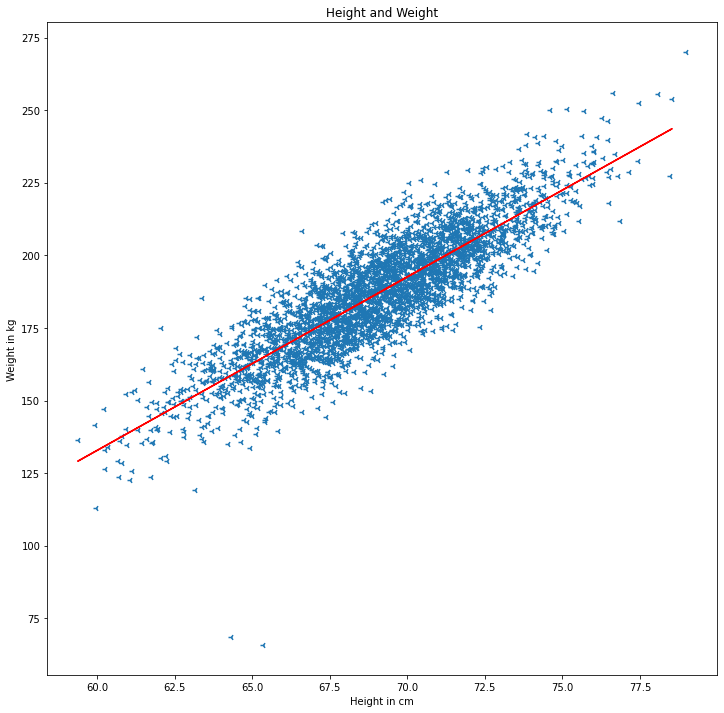

In [362]:
plt.figure(figsize=(12,12))
plt.scatter(df['Height'] , df['Weight'],marker='3') 
plt.plot(xtest , lr.predict(xtest), color='red') #best fit line based on testing data
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.title('Height and Weight')

Text(0.5, 1.0, 'Height and Weight')

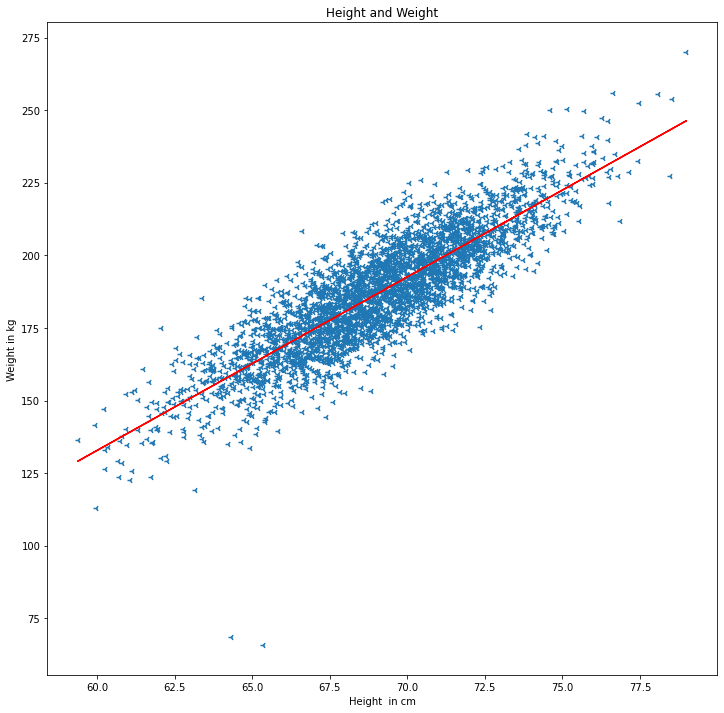

In [363]:
plt.figure(figsize=(12,12)) 
plt.scatter(df['Height'] , df['Weight'],marker='3') 
plt.plot(df[['Height']] , lr.predict(df[['Height']]), color='red') ##best fit line based on whole data set 
plt.xlabel('Height  in cm')
plt.ylabel('Weight in kg')
plt.title('Height and Weight')

#accuracy of model

In [364]:
lr.score(xtest, ytest) 

0.7313258168853622

In [365]:
lr.score(df[['Height']], df.Weight) 

0.7323100609319788

In [366]:
lr.score(xtrain, ytrain)

0.7327243206606744